Task 1: Hypothesis
Null Hypothesis: There is no significant difference in the mean weight of men and women
Alternative Hypothesis: There is a significant difference in the mean weight of men and women

Mean Weight (Male): 106.16
Mean Weight (Female): 105.70
t-statistic: 0.16
P-value: 0.8748
The difference in mean weight between males and females is not significant.


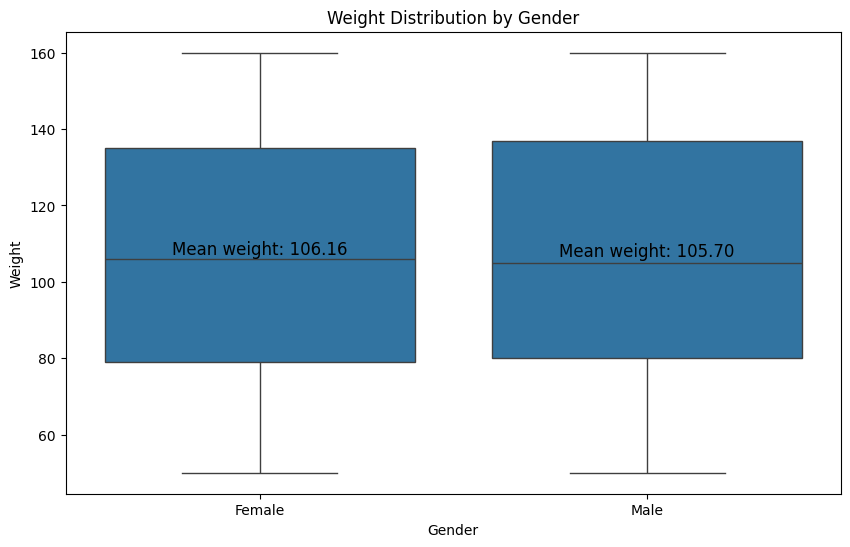

In [8]:
# Import Library
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Import csv file
data = pd.read_csv('StudentData.csv')

# Group data into genders
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Calculate the mean weights
mean_weight_male = male_data['Weight'].mean()
mean_weight_female = female_data['Weight'].mean()

# Print the mean values
print(f"Mean Weight (Male): {mean_weight_male:.2f}")
print(f"Mean Weight (Female): {mean_weight_female:.2f}")

#  Perform hypothesis testing
t_statistic, p_value = stats.ttest_ind(male_data['Weight'], female_data['Weight'])
 
# Check if p value is less than alpha
alpha = 0.05
if p_value < alpha:
    result = "significant"
else:
    result = "not significant"

print(f"t-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"The difference in mean weight between males and females is {result}.")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Weight', data=data)
plt.title('Weight Distribution by Gender')

# Annotate the plot with mean values
plt.text(0, mean_weight_male, f'Mean weight: {mean_weight_male:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, mean_weight_female, f'Mean weight: {mean_weight_female:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


The data above shows that the null hypothesis is supported and rejected the alternative hypothesis. T-statistics measures the difference between the means of two group. The higher the absolute value for t-statistics implies significant difference. While the lower the absolute value the more likely that the values are close or similar to each other. The t-statistic in this case suggests that the mean is almost similar. P-Value measures evidence against the null hypothesis. The higher the value of p-value than the significance level then it implys that null hypothesis is not supported and it doesn't have enough evidence against it. 

Task 2: Correlation Coefficient

Correlation Coefficient (Height vs. Weight): -0.00


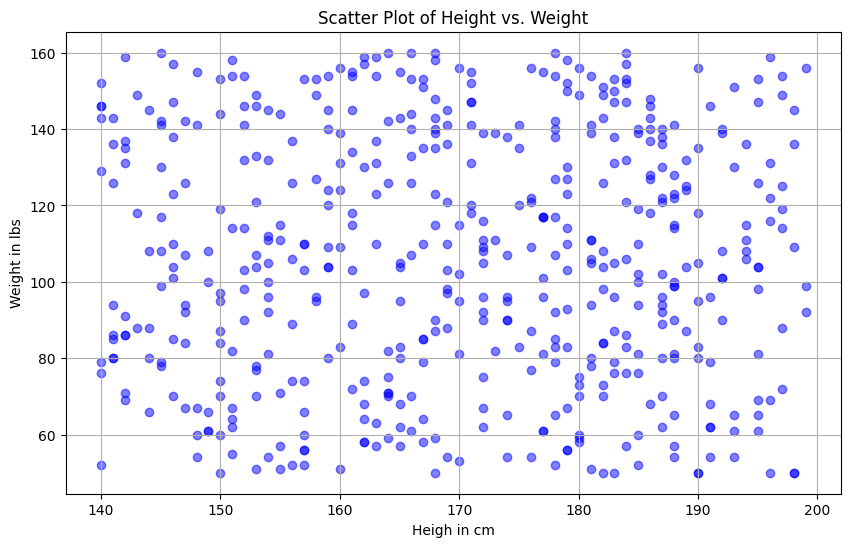

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import csv file
data = pd.read_csv('StudentData.csv')

# Retrieve height and weight data
height = data['Height']
weight = data['Weight']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(height, weight)[0, 1]

# Print out the correlation between height and weight
print(f"Correlation Coefficient (Height vs. Weight): {correlation_coefficient:.2f}")
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, alpha=0.5, c='b')
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Heigh in cm')
plt.ylabel('Weight in lbs')
plt.grid(True)
plt.show()



The correlation coeffiencent shows a 0.00%, which indicates that there is little to no linear relationship between height or weight. There could be other types of relationships, such as nonlinear or complex association, or other factors other than height that influence weight.

Task 3: Linear Regression

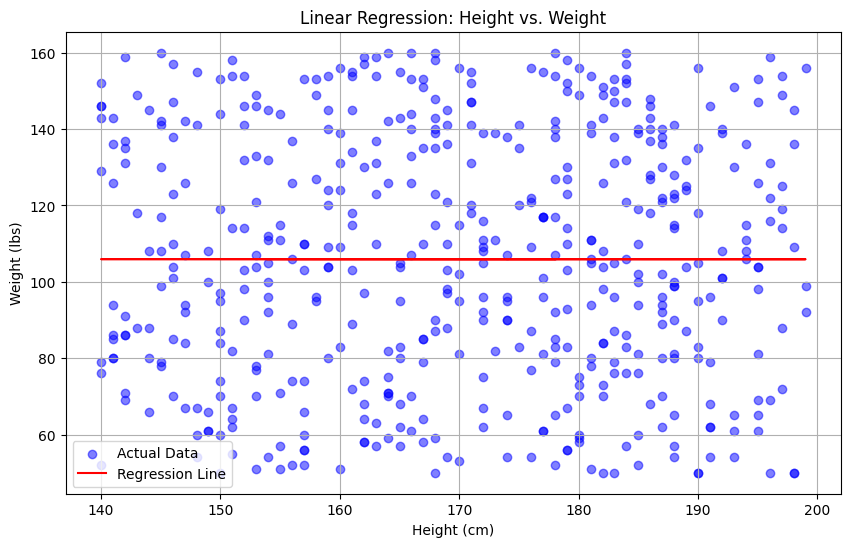

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 3.566e-05
Date:                Wed, 18 Oct 2023   Prob (F-statistic):              0.995
Time:                        20:07:46   Log-Likelihood:                -2447.6
No. Observations:                 500   AIC:                             4899.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.0119     15.121      7.011      0.0

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Import csv file
data = pd.read_csv('StudentData.csv')

# Retrieve height and weight data
height = data['Height']
weight = data['Weight']

# Add a constant term to the independent variable (height)
height_const = sm.add_constant(height)

# Build the linear regression model
model = sm.OLS(weight, height_const).fit()

# Get model predictions
weight_pred = model.predict(height_const)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, alpha=0.5, label='Actual Data', c='b')

# Add Regression Line
plt.plot(height, weight_pred, 'r', label='Regression Line')

# Labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (lbs)')
plt.title('Linear Regression: Height vs. Weight')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display the regression model summary
print(model.summary())


The visualization of the linear regression of height vs weight shows that a linear regression does not fit the data set provided. R-squared of 0.00 indicates that the independent variables explain almost none of the variability in the dependent variable. T-statistics suggest that the coefficient is not statistically significant due it being small. P-values associated with the t-statistics test the null hypothesis. Due to it being a number of 0.995, it indicates that height is not statistically significant predicator.

Adressing these issues could consist of reevaluating the model, check for data quality, transform variables, and or collect more data to improve model's performances

Task 4: Multiple Regression Model

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3197
Date:                Wed, 18 Oct 2023   Prob (F-statistic):              0.727
Time:                        20:07:51   Log-Likelihood:                -2447.3
No. Observations:                 500   AIC:                             4901.
Df Residuals:                     497   BIC:                             4913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.3936     25.467      4.806      0.0

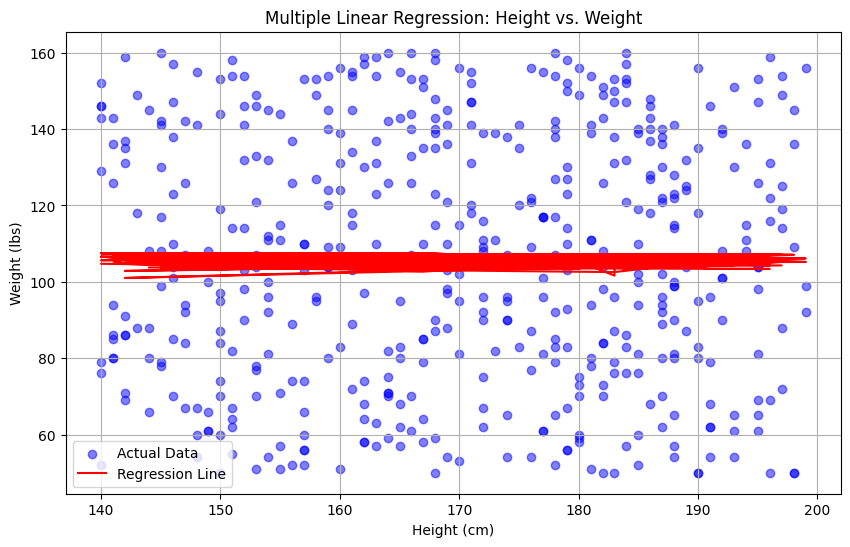

In [19]:
#Import libraries 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Import csv file
data = pd.read_csv('StudentData.csv')

# Retrieve Columns
X = data[['Height', 'Age']]
y = data['Weight']

# Add a constant term to the independent variables
X_const = sm.add_constant(X)

# Build the multiple linear regression model
model = sm.OLS(y, X_const).fit()

# Display the regression model summary
print(model.summary())

# Get model prediction
y_pred = model.predict(X_const)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Height'], data['Weight'], alpha=0.5, label='Actual Data', c='b')

# Overlay the regression line
plt.plot(data['Height'], y_pred, 'r', label='Regression Line')

# Labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (lbs)')
plt.title('Multiple Linear Regression: Height vs. Weight')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In the OLS regression report, there are statistics that could help us break down the information of the graph. The 0.001 of the r-squared indicates the independent variables (Height and Age) explain only a tiny fraction of the dependent variable (Weight).The coeffiencet due to it being close to zero, it displays that the variables has a weak relationship. Both p-value and t-statistics are not significant predictors. 

To address the issues, researchers could reevaluate the model, check for multicollinearity, transform variables and diagnose and address autocorrelation

Task 5: Solution

Two common assumptions of linear regressions:

Linearity: 
    Linear regression assumes that there is a linear relationship between the independent variables and the dependent variables. Ultimately could mean that the change in the dependent variable is proportional to the change in any of the independent variables. Violation of this assumption can lead to inaccurate model predictions
Independence of Errors:
    Linear assumes that the errors of the models are independent of each other. This means that the error form one observations should not provide information about the error in another observation. The residuals are assumed to be identically and independently distributed. Violation can lead to inefficient parameter estimates, incorrect p-values, and issues like autocorrection which can affect the validity of hypothesis test and confidence intervals.


R-squared: 0.9363356707491827
P-Value: 2.0423058758262716e-60


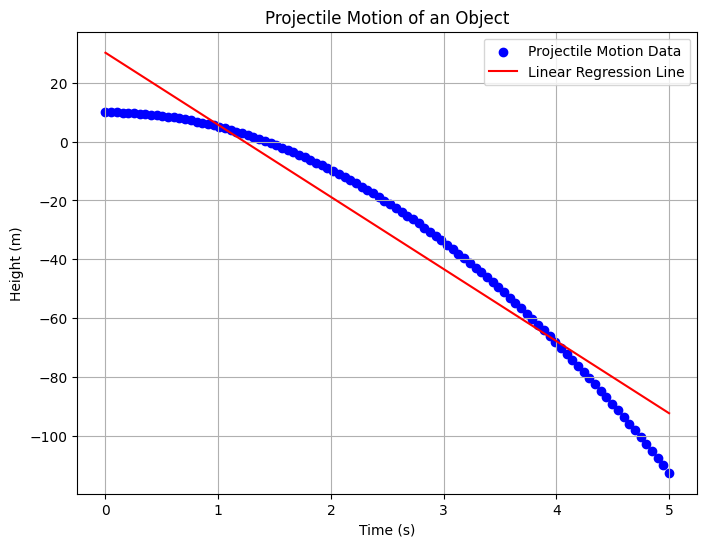

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Generate time values (0 to 5 seconds)
time = np.linspace(0, 5, 100)

# Calculate corresponding height values
height = 10 - 4.9 * time**2

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(time, height, label='Projectile Motion Data', color='blue')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion of an Object')

# Reshape time for linear regression
time_reshaped = time.reshape(-1, 1)

# Create and fit a linear regression model
regression = LinearRegression()
regression.fit(time_reshaped, height)

# Calculate the linear regression predictions
linear_predictions = regression.predict(time_reshaped)

# Plot the linear regression line
plt.plot(time, linear_predictions, label='Linear Regression Line', color='red')

# Calculate R-squared and p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(time, height)
r_squared = r_value**2

# Print R-squared and P-value
print(f'R-squared: {r_squared}')
print(f'P-Value: {p_value}')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In the model for the projectile motion of an object, the blue dots represented the data which was created by python. The model shows an object dropping over the course of 5 second. The statistics of the model shows, regarding to the r-squared, that the model is a good fit for the data. This violates the linear regression assumption of linearity. Also stats state it is a good fit, when the visualization is review, a parabolic graph which could be deduced to a fitted curve. P-value also signifies that the independent variables are likely yo be meaningful predictors of the model.

Task 6: Nonlinear Model

a : -4.796400059070462
b : -0.5477323830860821
c : 10.53154185731713


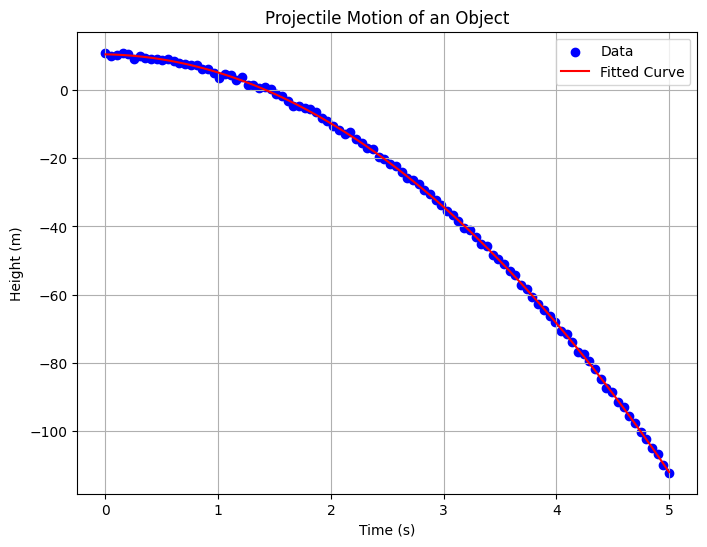

In [22]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the quadratic function to fit
def quadratic_function(time, a, b, c):
    return a * time**2 + b * time + c

# Generate time values (0 to 5 seconds)
time = np.linspace(0, 5, 100)

# Calculate corresponding height values
height = 10 - 4.9 * time**2

# Add noise to simulate real data
np.random.seed(0)
noise = np.random.normal(0, 0.5, time.shape)
height_with_noise = height + noise

# Fit the quadratic function to the noisy data
params, covariance = curve_fit(quadratic_function, time, height_with_noise)

# Get the optimized parameters
a, b, c = params

# Create the fitted curve
fitted_curve = quadratic_function(time, a, b, c)

# Plot data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(time, height_with_noise, label='Data', color='blue')
plt.plot(time, fitted_curve, label='Fitted Curve', color='red')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion of an Object')

# Print out parameters
print(f'a : {a}')
print(f'b : {b}')
print(f'c : {c}')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In the visualization above, we utilized quadratic equation to create a curve for the data that fit it much better. The fitted curve is fundemental in data analysis and modeling. It helps uncover patterns, predictions, evaluate models and gain insight from the data.